In [1]:
from src.lib.mapmatching import MapMatching
from src.lib.visualizer import Visualizer
from src.type import Position
from logging import getLogger
import time

In [2]:
logger = getLogger(__name__)

map_matching = MapMatching("UNUSED", logger)
visualizer = Visualizer("UNUSED", logger)

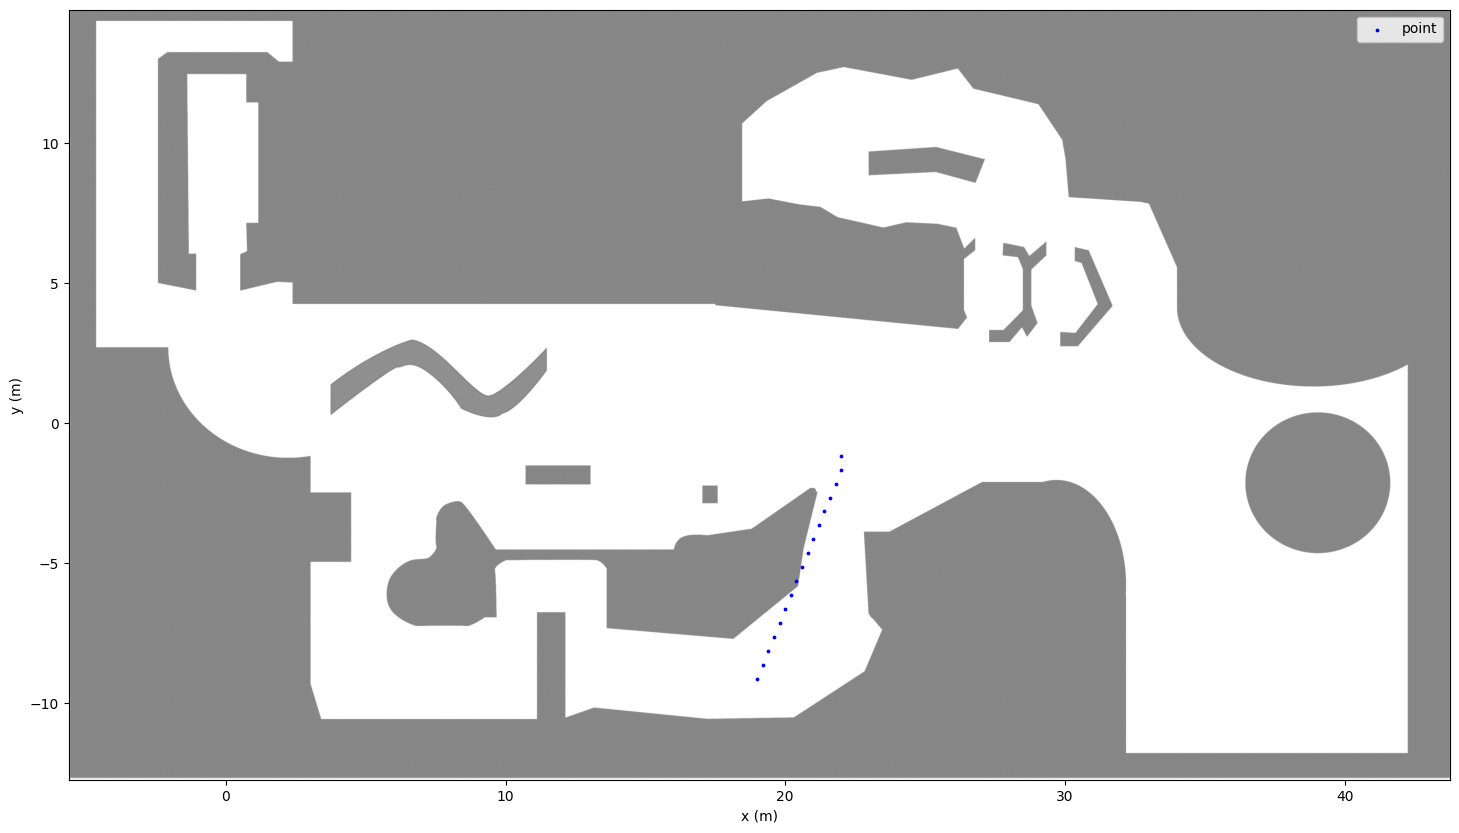

In [3]:
points: list[Position] = [
    Position(22.01, -1.16, 0),
    Position(22.00, -1.66, 0),
    Position(21.80, -2.16, 0),
    Position(21.60, -2.66, 0),
    Position(21.40, -3.16, 0),
    Position(21.20, -3.66, 0),
    Position(21.00, -4.16, 0),
    Position(20.80, -4.66, 0),
    Position(20.60, -5.16, 0),
    Position(20.40, -5.66, 0),
    Position(20.20, -6.16, 0),
    Position(20.00, -6.66, 0),
    Position(19.80, -7.16, 0),
    Position(19.60, -7.66, 0),
    Position(19.40, -8.16, 0),
    Position(19.20, -8.66, 0),
    Position(19.00, -9.16, 0),
]

datetime = time.strftime("%Y%m%d_%H%M%S")
visualizer.plot_map_for_mapmatching(points, f"zzz/{datetime}.png")